#Import

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.1 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Reshape, RepeatVector, TimeDistributed, Conv2D, GRU, MaxPooling2D, LSTM, Dense, Dropout, Input, Reshape, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')

Checking Available GPUs

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Num GPUs Available:  1


#Keras Deep Learning Model

In [ ]:
def create_keras_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9998 - loss: 3.2196e-04 - val_accuracy: 0.2070 - val_loss: 113.4006
Epoch 2/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 1.0000 - loss: 7.9573e-15 - val_accuracy: 0.2070 - val_loss: 113.4670
Epoch 3/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 1.0000 - loss: 6.0608e-16 - val_accuracy: 0.2070 - val_loss: 100.1725
Epoch 4/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 1.0000 - loss: 5.9280e-15 - val_accuracy: 0.2070 - val_loss: 131.0314
Epoch 5/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 1.0000 - loss: 3.5751e-17 - val_accuracy: 0.2070 - val_loss: 120.5403
Epoch 6/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 1.0000 - loss: 3.8503e-13 - val_accuracy: 0.2070 - val_loss: 197.7834
Epoch 7/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 1.0000 - loss: 6.2392e-18 - val_accuracy: 0.2070 - val_loss: 86.8922
Epoch 8/10
35552/35552 ━━━━━

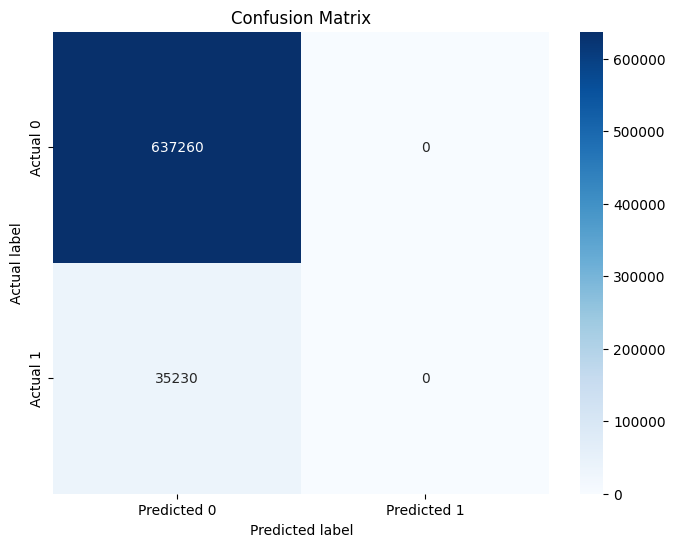

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 19s 884us/step


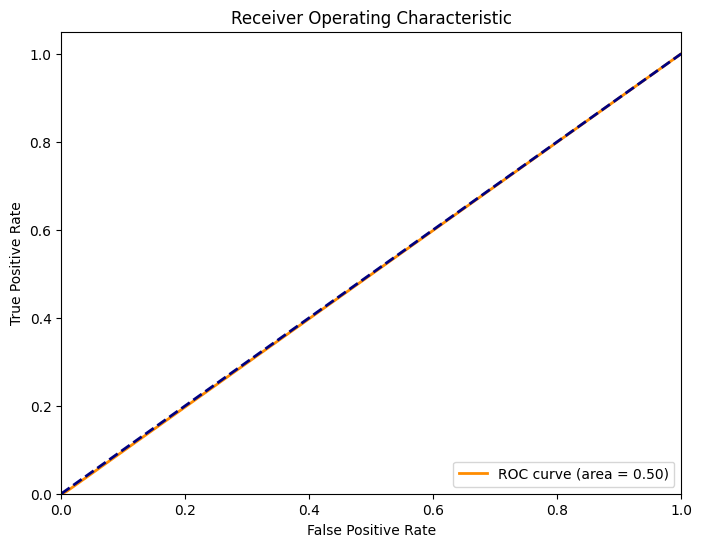

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)


input_shape = (X_train.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_keras)
precision = precision_score(y_test, y_pred_keras)
recall = recall_score(y_test, y_pred_keras)
f1 = f1_score(y_test, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


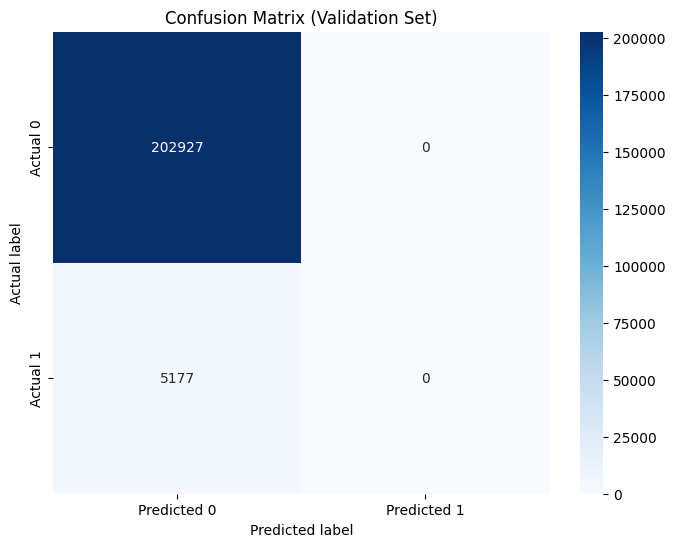

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 6s 866us/step


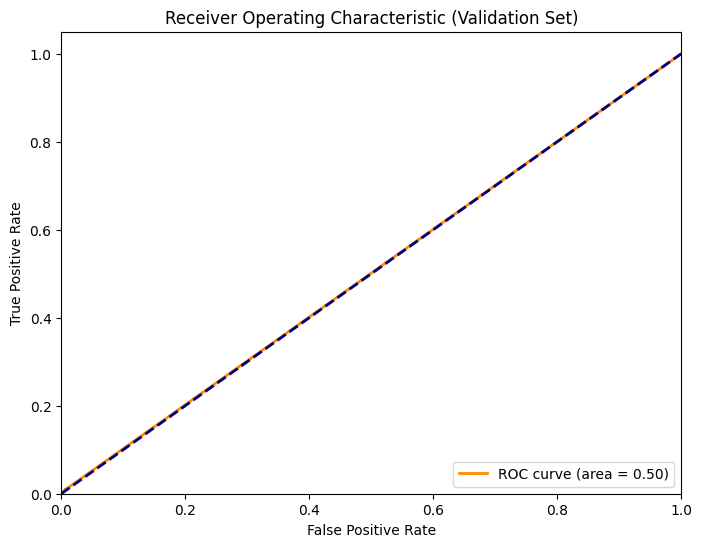

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

y_pred_keras_val = (model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_keras_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_keras_val)
precision_val = precision_score(y_val, y_pred_keras_val)
recall_val = recall_score(y_val, y_pred_keras_val)
f1_val = f1_score(y_val, y_pred_keras_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
metrics_df_val

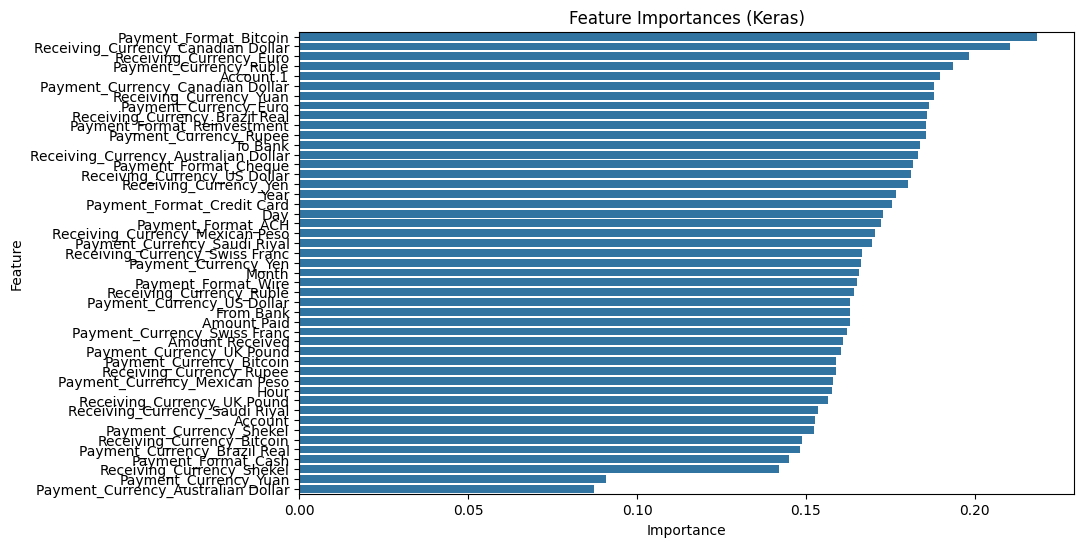

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Keras)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9999 - loss: 2.9777e-04 - val_accuracy: 0.2070 - val_loss: 128.2884
Epoch 2/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 1.0000 - loss: 1.1728e-15 - val_accuracy: 0.2070 - val_loss: 131.2484
Epoch 3/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 1.0000 - loss: 2.5009e-14 - val_accuracy: 0.2070 - val_loss: 154.5000
Epoch 4/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 1.0000 - loss: 2.7264e-15 - val_accuracy: 0.2070 - val_loss: 143.8382
Epoch 5/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 1.0000 - loss: 1.0758e-15 - val_accuracy: 0.2070 - val_loss: 160.4294
Epoch 6/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 1.0000 - loss: 5.2552e-15 - val_accuracy: 0.2070 - val_loss: 139.6574
Epoch 7/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 1.0000 - loss: 6.3323e-16 - val_accuracy: 0.2070 - val_loss: 137.7132
Epoch 8/30
35552/35552 ━━━━

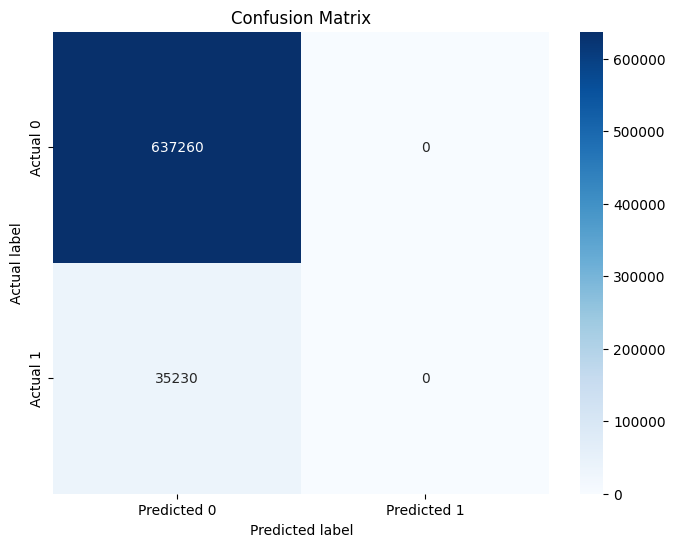

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 19s 907us/step


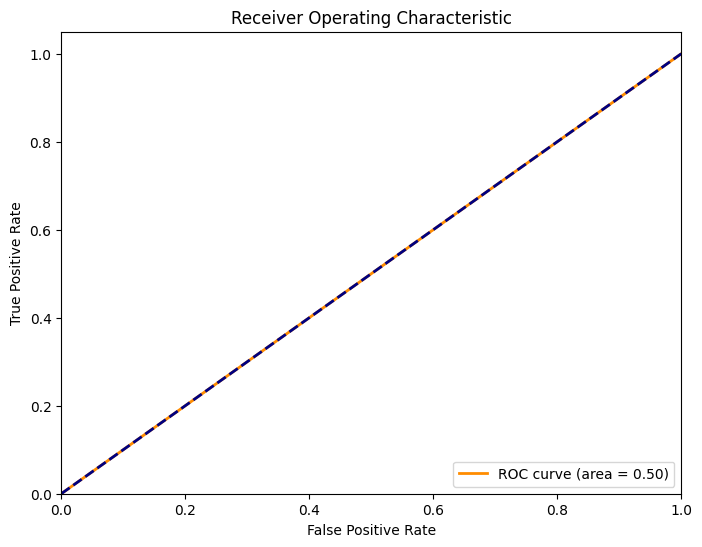

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)


input_shape = (X_train.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_keras)
precision = precision_score(y_test, y_pred_keras)
recall = recall_score(y_test, y_pred_keras)
f1 = f1_score(y_test, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 5s 816us/step


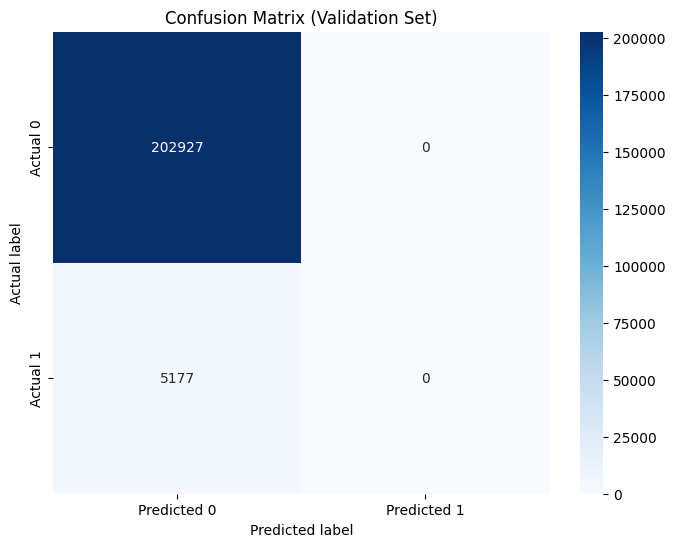

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 6s 858us/step


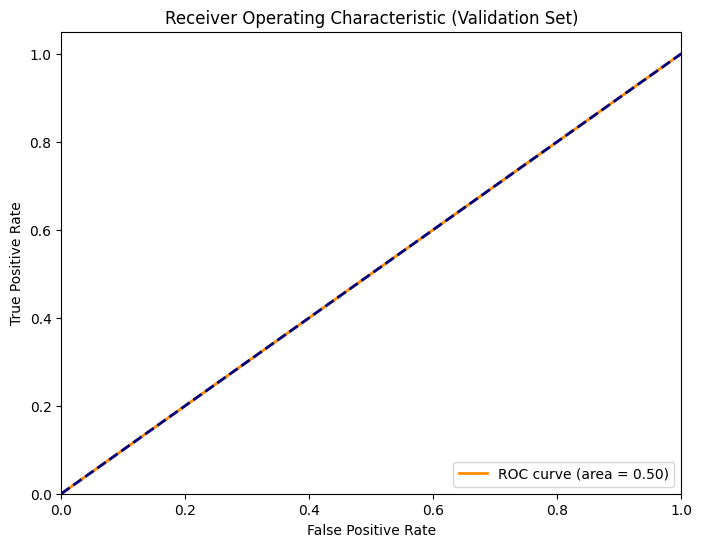

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

y_pred_keras_val = (model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_keras_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_keras_val)
precision_val = precision_score(y_val, y_pred_keras_val)
recall_val = recall_score(y_val, y_pred_keras_val)
f1_val = f1_score(y_val, y_pred_keras_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
metrics_df_val

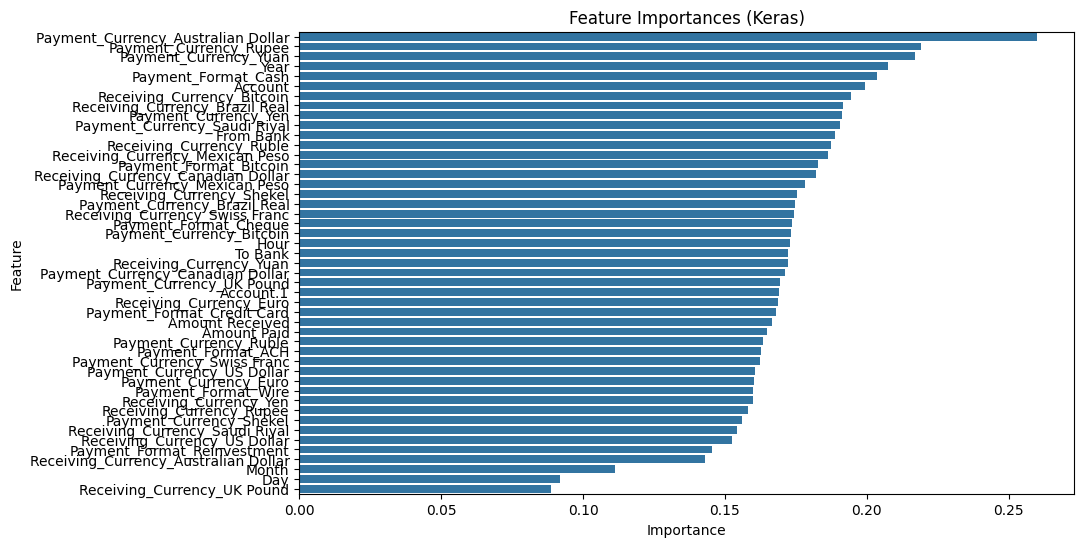

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Keras)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Recurrent Neural Networks (RNNs)

In [ ]:
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.9999 - loss: 2.6130e-04 - val_accuracy: 0.2070 - val_loss: 171.0670
Epoch 2/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 3.3827e-21 - val_accuracy: 0.2070 - val_loss: 134.3476
Epoch 3/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 1.6627e-21 - val_accuracy: 0.2070 - val_loss: 170.6359
Epoch 4/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 3.0012e-21 - val_accuracy: 0.2070 - val_loss: 212.5693
Epoch 5/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 3.7323e-18 - val_accuracy: 0.2070 - val_loss: 212.5634
Epoch 6/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 2.9524e-20 - val_accuracy: 0.2070 - val_loss: 165.0767
Epoch 7/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 1.1534e-21 - val_accuracy: 0.2070 - val_loss: 144.3250
Epoch 8/10
35552/35552 ━━━━

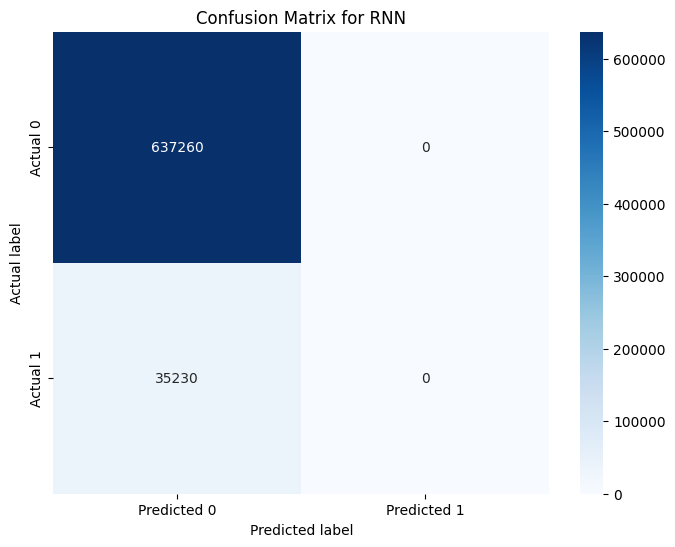

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


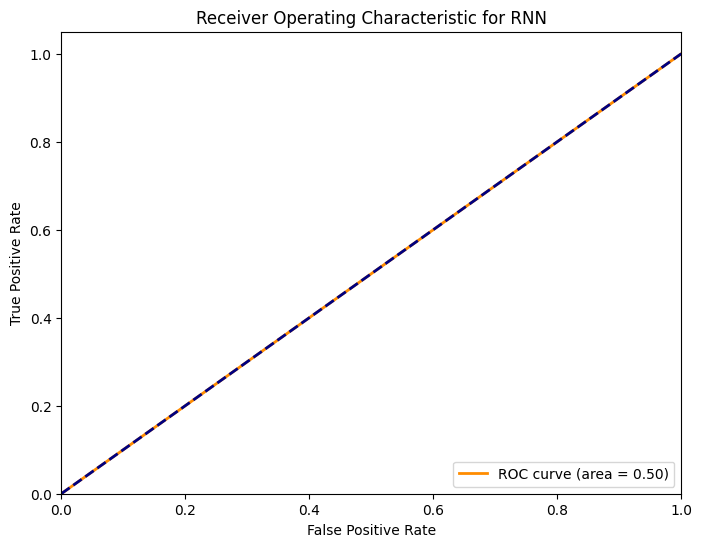

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


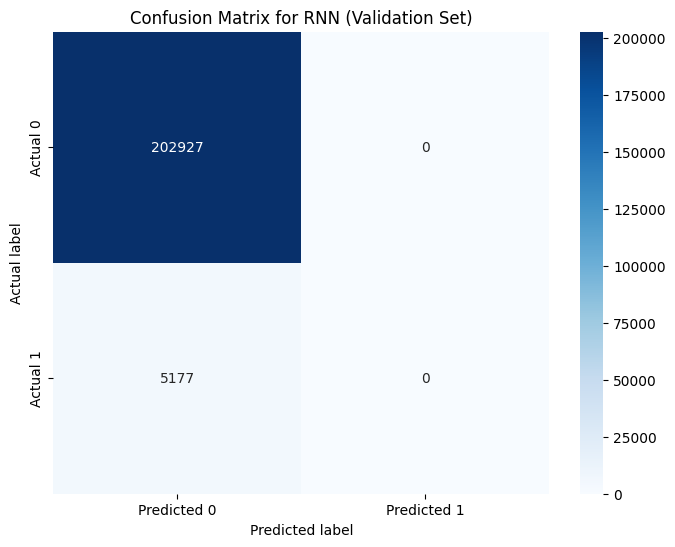

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


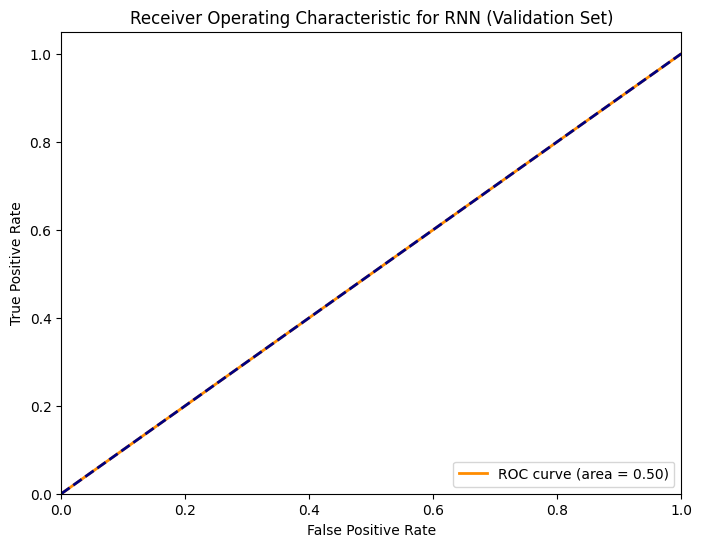

Metrics for RNN Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

y_pred_rnn_val = (rnn_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_rnn_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = rnn_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_rnn_val)
precision_val = precision_score(y_val, y_pred_rnn_val)
recall_val = recall_score(y_val, y_pred_rnn_val)
f1_val = f1_score(y_val, y_pred_rnn_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for RNN Model (Validation Set):")
metrics_df_val

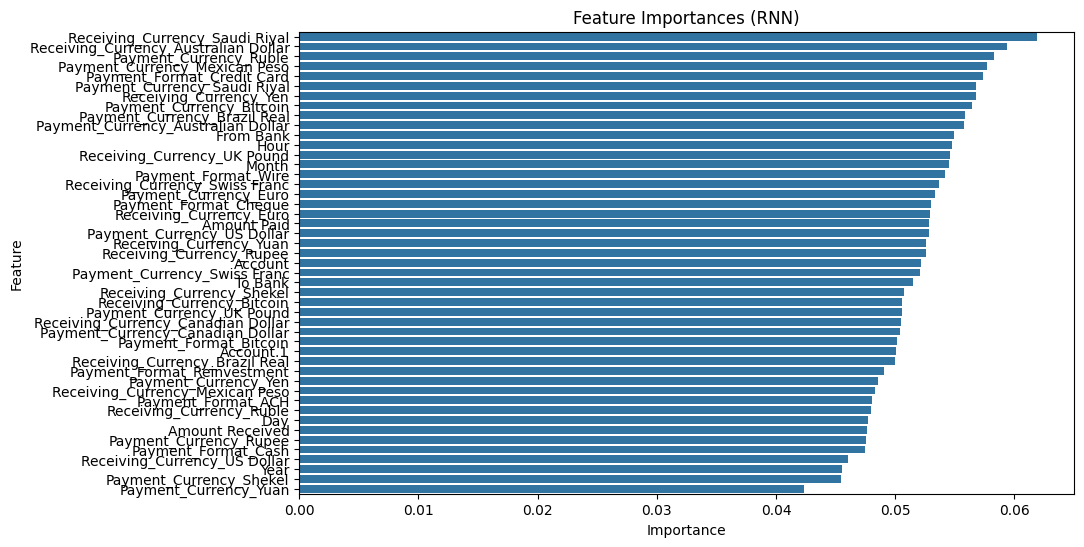

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.9999 - loss: 2.6792e-04 - val_accuracy: 0.2070 - val_loss: 137.5356
Epoch 2/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 9.5371e-24 - val_accuracy: 0.2070 - val_loss: 156.7704
Epoch 3/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.3249e-24 - val_accuracy: 0.2070 - val_loss: 140.3374
Epoch 4/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.8597e-25 - val_accuracy: 0.2070 - val_loss: 148.1413
Epoch 5/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 1.6424e-24 - val_accuracy: 0.2070 - val_loss: 135.2363
Epoch 6/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 1.9493e-23 - val_accuracy: 0.2070 - val_loss: 134.2640
Epoch 7/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 1.6417e-25 - val_accuracy: 0.2070 - val_loss: 137.8554
Epoch 8/30
35552/35552 ━━━━

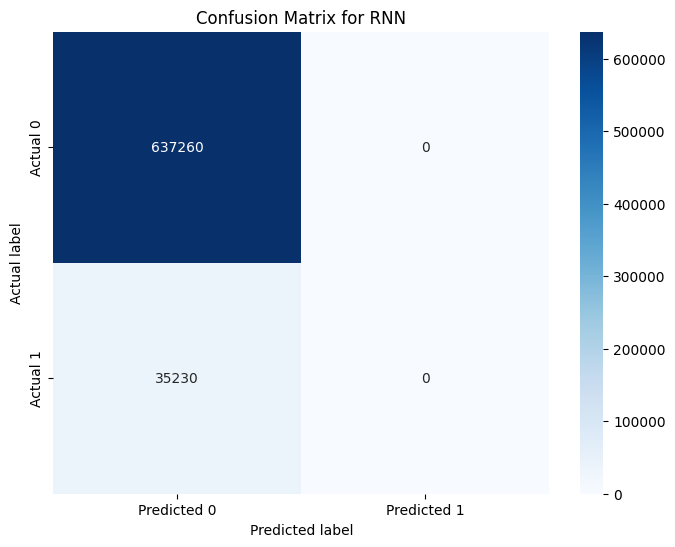

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


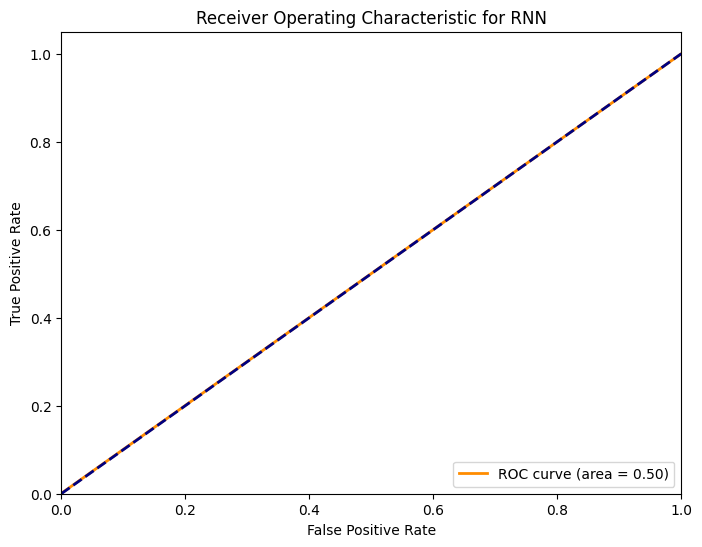

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


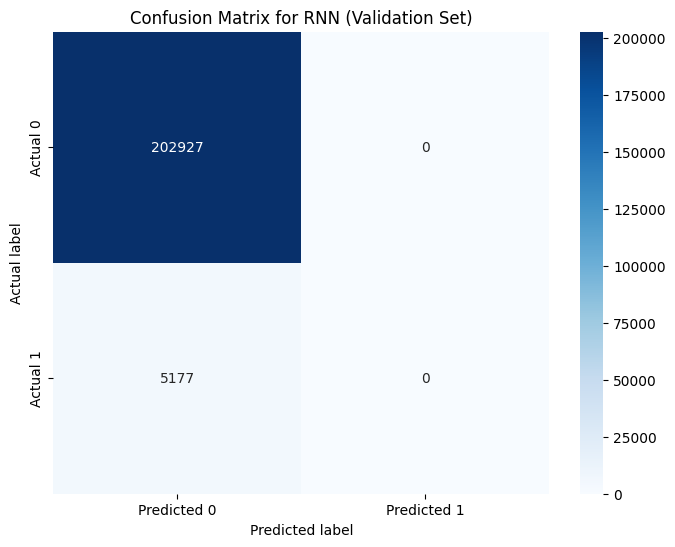

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


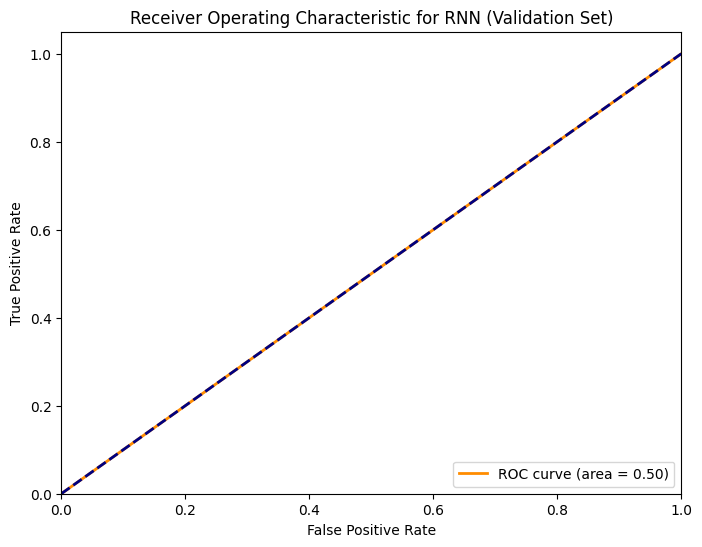

Metrics for RNN Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

y_pred_rnn_val = (rnn_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_rnn_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = rnn_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_rnn_val)
precision_val = precision_score(y_val, y_pred_rnn_val)
recall_val = recall_score(y_val, y_pred_rnn_val)
f1_val = f1_score(y_val, y_pred_rnn_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for RNN Model (Validation Set):")
metrics_df_val

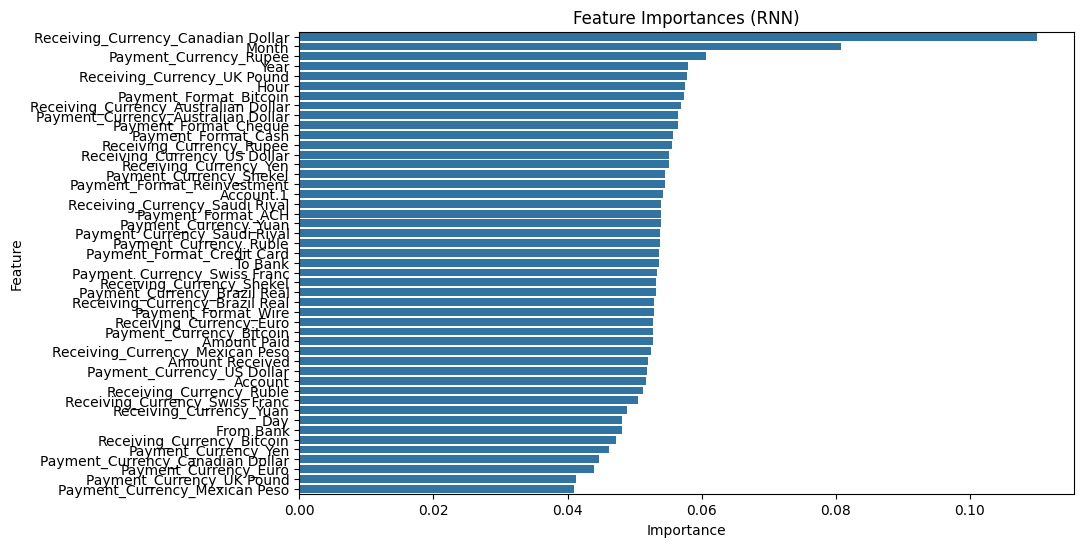

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Long Short Term Memory (LSTM)

In [6]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 154s 4ms/step - accuracy: 0.9999 - loss: 2.1277e-04 - val_accuracy: 0.2070 - val_loss: 179.0666
Epoch 2/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 151s 4ms/step - accuracy: 1.0000 - loss: 7.1336e-23 - val_accuracy: 0.2070 - val_loss: 238.4684
Epoch 3/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 152s 4ms/step - accuracy: 1.0000 - loss: 1.8007e-18 - val_accuracy: 0.2070 - val_loss: 190.0801
Epoch 4/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 150s 4ms/step - accuracy: 1.0000 - loss: 1.1382e-22 - val_accuracy: 0.2070 - val_loss: 179.3121
Epoch 5/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 150s 4ms/step - accuracy: 1.0000 - loss: 2.3571e-22 - val_accuracy: 0.2070 - val_loss: 205.0558
Epoch 6/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 152s 4ms/step - accuracy: 1.0000 - loss: 1.1835e-22 - val_accuracy: 0.2070 - val_loss: 196.1917
Epoch 7/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 153s 4ms/step - accuracy: 1.0000 - loss: 1.3206e-22 - val_accuracy: 0.2070 - val_loss: 176.2952
Epoch 8/10
35552/355

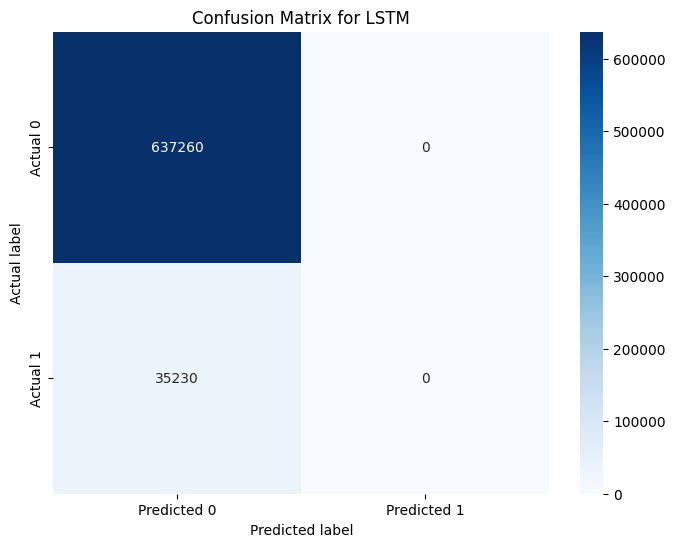

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step


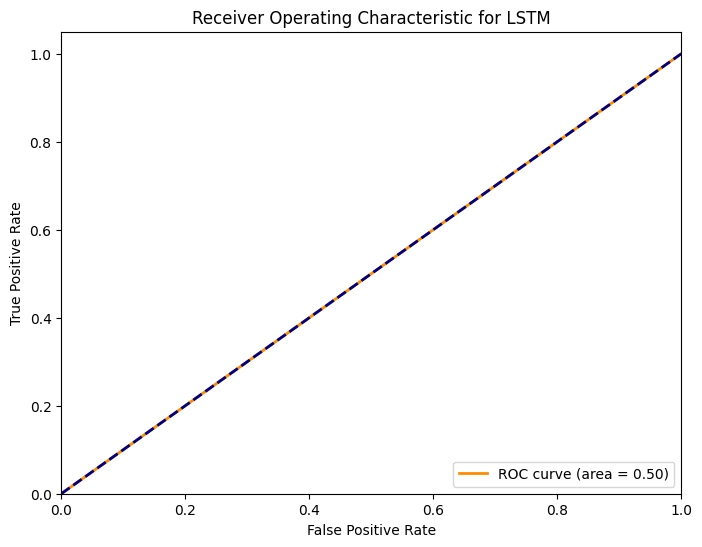

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


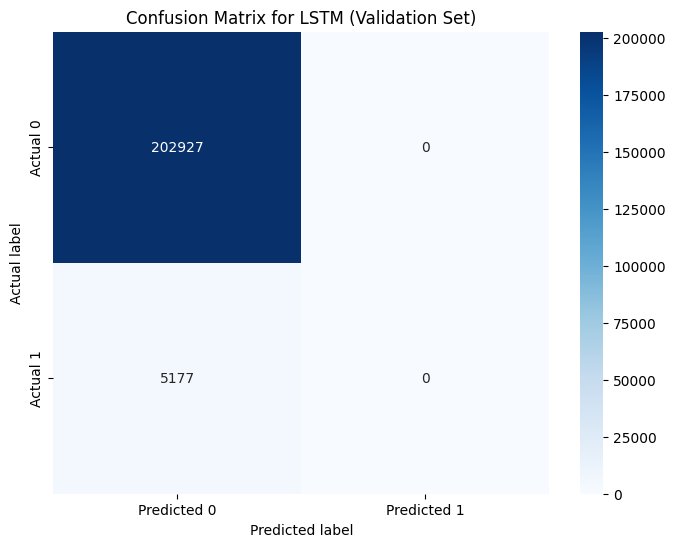

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


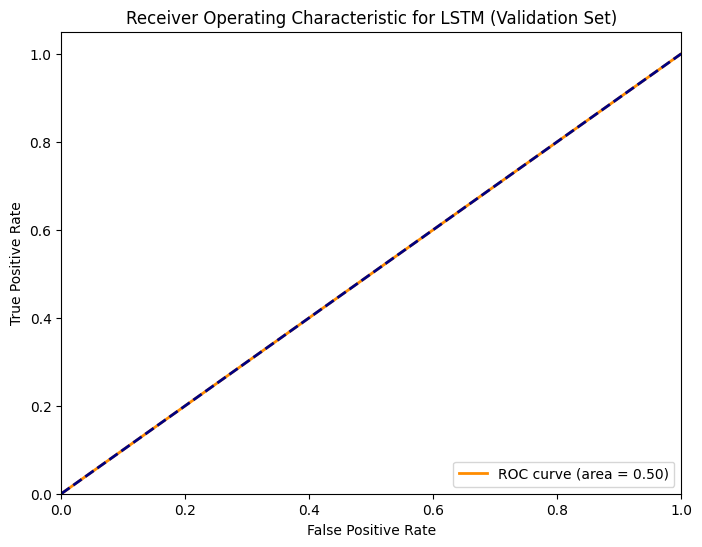

Metrics for LSTM Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [ ]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

y_pred_lstm_val = (lstm_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_lstm_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = lstm_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_lstm_val)
precision_val = precision_score(y_val, y_pred_lstm_val)
recall_val = recall_score(y_val, y_pred_lstm_val)
f1_val = f1_score(y_val, y_pred_lstm_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for LSTM Model (Validation Set):")
metrics_df_val

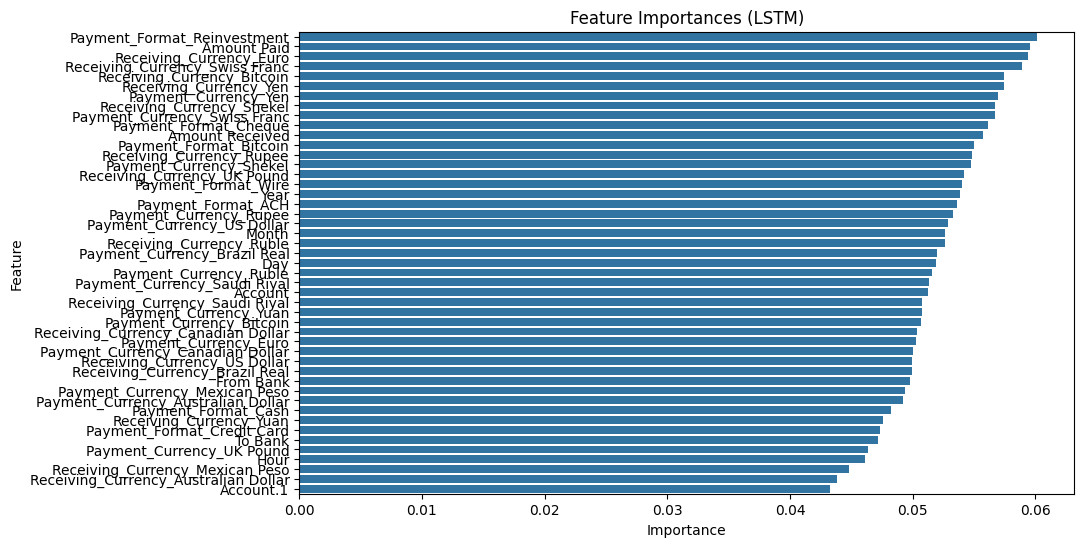

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = lstm_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9999 - loss: 2.1946e-04 - val_accuracy: 0.2070 - val_loss: 211.8144
Epoch 2/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 1.0000 - loss: 4.9926e-18 - val_accuracy: 0.2070 - val_loss: 151.8185
Epoch 3/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 1.0588e-19 - val_accuracy: 0.2070 - val_loss: 144.4665
Epoch 4/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 1.0000 - loss: 8.8724e-20 - val_accuracy: 0.2070 - val_loss: 144.0118
Epoch 5/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 5.0675e-18 - val_accuracy: 0.2070 - val_loss: 147.4249
Epoch 6/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 1.0000 - loss: 9.4881e-13 - val_accuracy: 0.2070 - val_loss: 155.8275
Epoch 7/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 2.2148e-24 - val_accuracy: 0.2070 - val_loss: 141.6900
Epoch 8/30
35552/35552 ━━━━

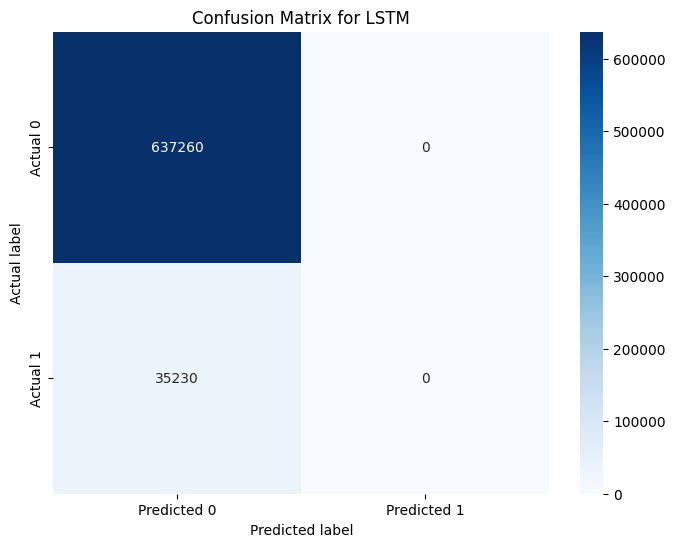

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


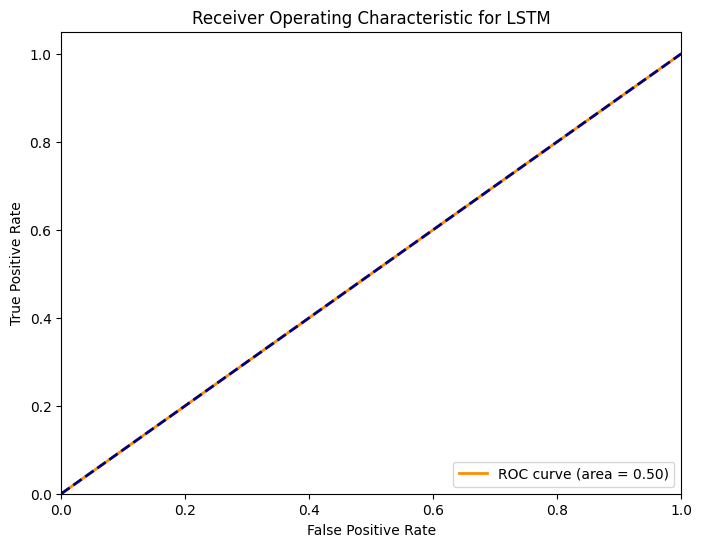

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [7]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


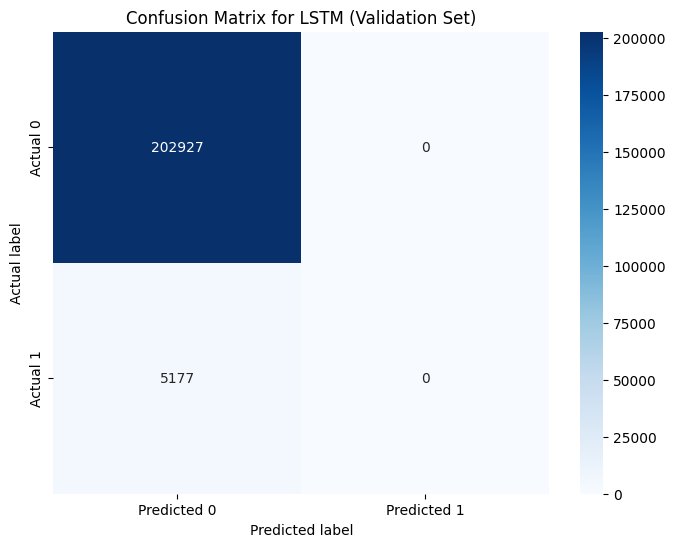

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


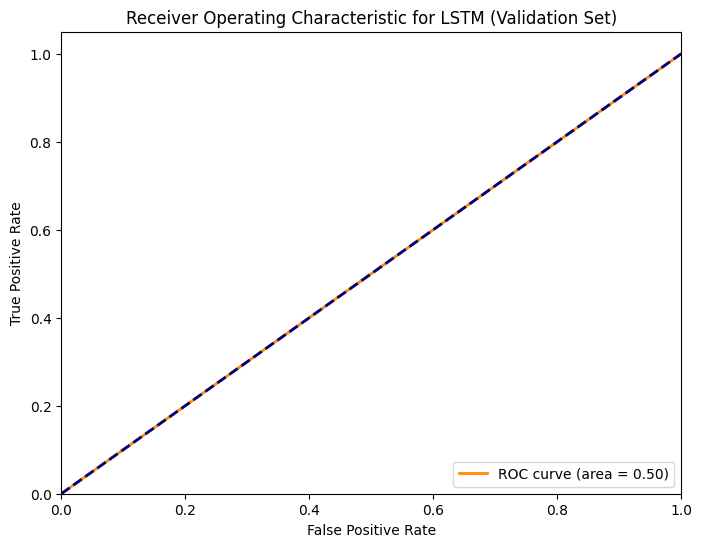

Metrics for LSTM Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [8]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

y_pred_lstm_val = (lstm_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_lstm_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = lstm_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_lstm_val)
precision_val = precision_score(y_val, y_pred_lstm_val)
recall_val = recall_score(y_val, y_pred_lstm_val)
f1_val = f1_score(y_val, y_pred_lstm_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for LSTM Model (Validation Set):")
metrics_df_val

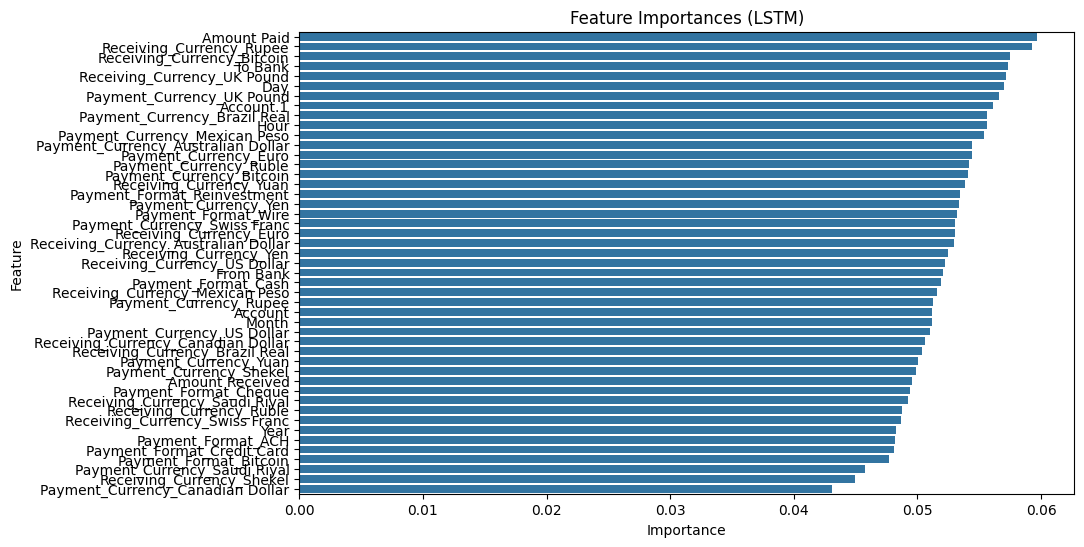

In [9]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = lstm_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()